         date   description    category   amount
0  2023-01-01     groceries        food    45.30
1  2023-01-02        coffee  restaurant     4.50
2  2023-01-02    bus ticket   transport     2.75
3  2023-01-03  monthly rent        rent  1200.00
4  2023-01-04         lunch  restaurant    12.50


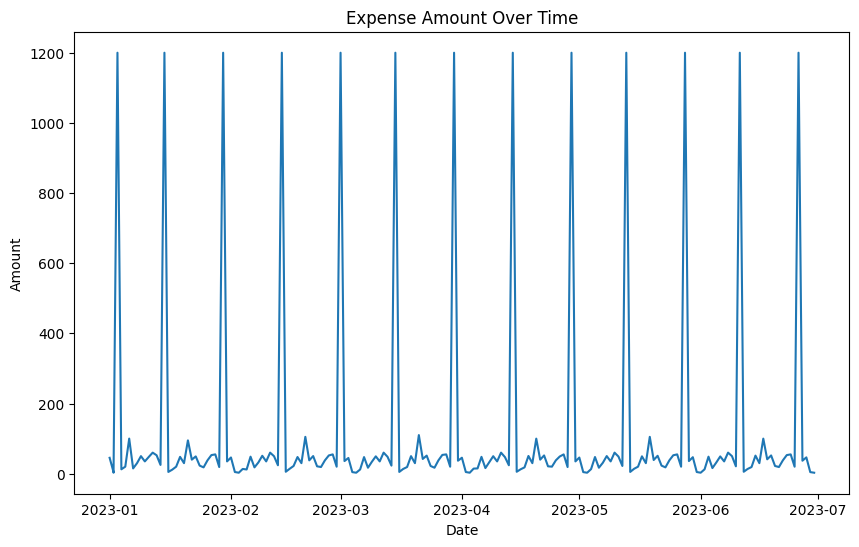

Shape of X: (152, 30, 1)
Shape of y: (152, 1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('myexpenses.csv')

# Check the dataset
print(df.head())

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Sort the data by date to ensure it's in chronological order
df = df.sort_values('date')

# Visualize the expense data (optional, to get a sense of the data)
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['amount'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Expense Amount Over Time')
plt.show()

# Extract the 'amount' column for use in modeling
expense_data = df['amount'].values
expense_data = expense_data.reshape(-1, 1)

# Normalize the data to be between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(expense_data)

# Function to create sequences for LSTM input (e.g., last 30 days)
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

SEQ_LENGTH = 30  # Using 30 days of data to predict the next day's expense

# Create sequences
X = create_sequences(scaled_data, SEQ_LENGTH)

# The target (y) is the next day's expense, which is the next value after the last value in the sequence
y = scaled_data[SEQ_LENGTH:]

# Reshaping X for LSTM input: (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


2025-04-02 01:12:24.456644: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-02 01:12:24.461753: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 01:12:24.714024: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 01:12:24.828990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-02 01:12:24.976124: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0918 - val_loss: 0.0603
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0715 - val_loss: 0.0588
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0870 - val_loss: 0.0594
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0652 - val_loss: 0.0582
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0769 - val_loss: 0.0576
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0593 - val_loss: 0.0572
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0521 - val_loss: 0.0566
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0569 - val_loss: 0.0561
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0714 - val_loss: 0.0559
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0611 - val_loss: 0.0549
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0510 - val_loss: 0.0542
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0570 - val_loss: 0.0533


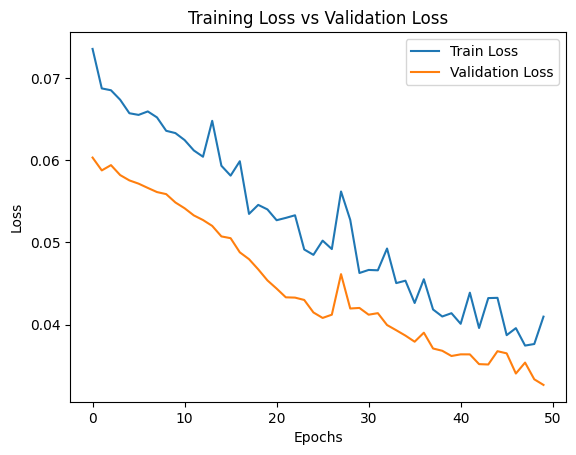

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Define sequence length
SEQ_LENGTH = 30  # For predicting based on the last 30 days

# Updated Model with More LSTM Units and Dropout for Regularization
model = Sequential([
    LSTM(100, activation='relu', input_shape=(SEQ_LENGTH, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model (you will need to pass your X and y variables here)
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Plot the loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0370 - val_loss: 0.0322
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0365 - val_loss: 0.0317
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0284 - val_loss: 0.0308
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0306 - val_loss: 0.0302
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0330 - val_loss: 0.0335
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0322 - val_loss: 0.0290
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - val_loss: 0.0302
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0369 - val_loss: 0.0338
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0353 - val_loss: 0.0305
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0378 - val_loss: 0.0297


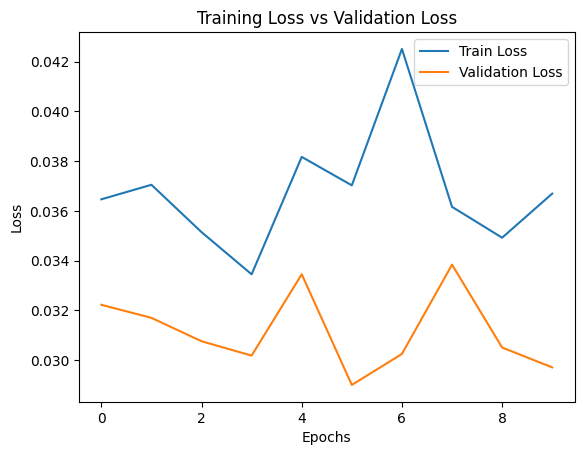

In [17]:
# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


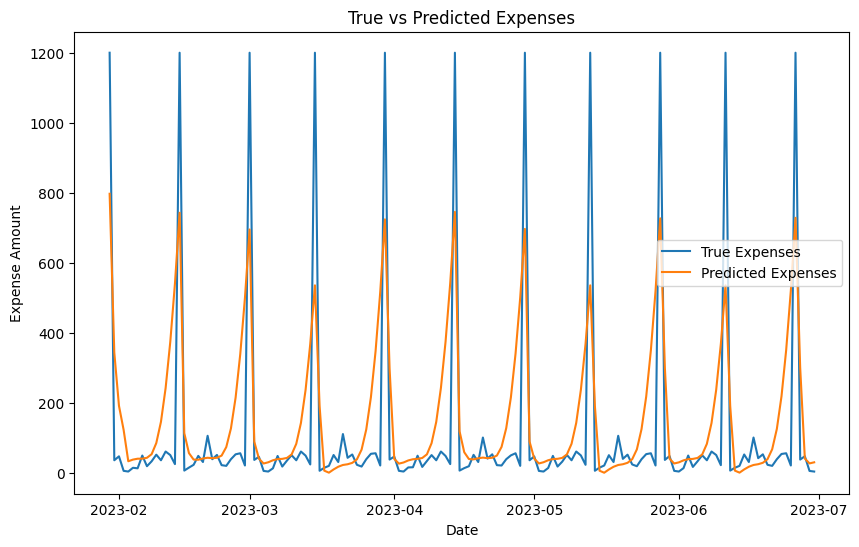

In [18]:
# Make predictions on the entire dataset
predicted_expenses = model.predict(X)

# Inverse transform the predictions to get the actual values
predicted_expenses = scaler.inverse_transform(predicted_expenses)

# Plot the true vs predicted expenses
plt.figure(figsize=(10, 6))
plt.plot(df['date'][SEQ_LENGTH:], expense_data[SEQ_LENGTH:], label='True Expenses')
plt.plot(df['date'][SEQ_LENGTH:], predicted_expenses, label='Predicted Expenses')
plt.xlabel('Date')
plt.ylabel('Expense Amount')
plt.legend()
plt.title('True vs Predicted Expenses')
plt.show()


In [20]:
# Save the trained model
model.save('expense_prediction_model.h5')
print("Model saved as 'expense_prediction_model.h5'")


Model saved as 'expense_prediction_model.h5'


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the training set
train_predictions = model.predict(X)

# Inverse scale the predictions and actual values back to their original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_actual = scaler.inverse_transform(y)

# Calculate error metrics
mae = mean_absolute_error(y_actual, train_predictions)
mse = mean_squared_error(y_actual, train_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Absolute Error: 127.9080712822315
Mean Squared Error: 44474.42962706919
